In [40]:
import pickle
import numpy as np
import PIL.Image
import itertools
from IPython.core.display import Image, display
import scipy.ndimage
import random
import numpy as np
import matplotlib.pylab as plt
import tqdm
import math
%matplotlib inline

# Загружаем датасет

In [41]:
with open('./hw_1_train.pickle', 'rb') as f:
    train = pickle.load(f)

with open('./hw_1_test_no_lables.pickle', 'rb') as f:
    test_no_lables = pickle.load(f)

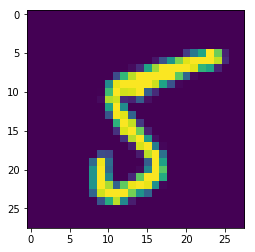

In [42]:
# Пример, как можно визуализировать данные
plt.imshow(train['data'][0].reshape(28,28))

# Обучаем модель

In [43]:
data = train['data']
labels = train['labels']

labels[labels==6] = 1
labels[labels==5] = -1

In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2)

mean = np.mean(x_train, axis=0)
std = np.std(x_train, axis=0)

In [45]:
def prepare_data(X):
    normalized = (X - mean) / (std+10e-5)
    prepared = np.hstack([ np.ones((normalized.shape[0], 1)), normalized] )
    return prepared

def predict (X, w):
    return 1 / (1 + np.exp(-(X * w).sum(axis=1)))

def get_prediction(prob):
    prob[prob <= 0.5] = -1
    prob[prob > 0.5] = 1
    return prob

def compute_cur_results(X, y, w):
    p = predict(X, w)
    loss = metrics.log_loss(y, p)
    classes = get_prediction(p)
    acc = metrics.accuracy_score(classes, y)
    return [loss, acc]

In [46]:
x_train = prepare_data(x_train)
x_test = prepare_data(x_test)

tr_eval = []
te_eval = []
for i in range (2):
    tr_eval.append([])
    te_eval.append([])

w = np.random.normal(scale=0.001, size = x_train.shape[1])

In [47]:
from sklearn import metrics
import tqdm

validation_freq = 3

for iter in tqdm.tqdm_notebook(range(300)):
    for i in range(x_train.shape[0]):
        j = np.random.randint(0, x_train.shape[0])
        grad = - y_train[j] * x_train[j] / \
            ( 1 + math.exp( y_train[j] * np.dot(w.T, x_train[j]) ) ) + 0.0007 * w
        w = w - 10e-6 * grad
    
    if(iter % validation_freq == 0):
        tr_res = compute_cur_results(x_train, y_train, w)
        te_res = compute_cur_results(x_test, y_test, w)
        tr_eval[0].append(tr_res[0])
        tr_eval[1].append(tr_res[1])
        te_eval[0].append(te_res[0])
        te_eval[1].append(te_res[1])
    

# Оцениваем результат

Обязательно отрисуйте 2 графика:
- loss на обучающем и тестовом множесте
- % правильно классифицированных примеров на тестовом и обучающем множестве

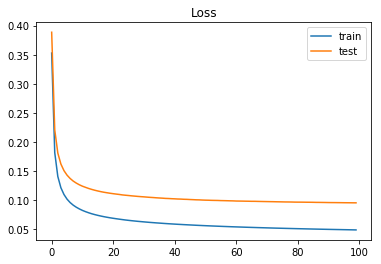

In [54]:
plt.title('Loss')
plt.plot(tr_eval[0], label='train')
plt.plot(te_eval[0], label='test')
plt.legend()

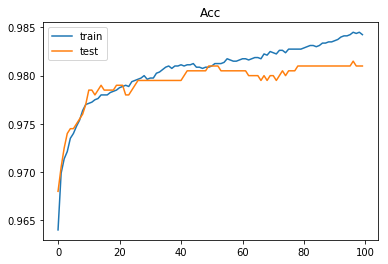

In [55]:
plt.title('Acc')
plt.plot(tr_eval[1], label='train')
plt.plot(te_eval[1], label='test')
plt.legend()

# Сохраняем данные для кагла

https://www.kaggle.com/t/513ea517806348848dc78c4f41d44528

Результат записывается в простой текстовый файл. Первая строчка "Id,Prediction", далее для каждого примера из валидационного множества записывается его Id (порядковый номер, с нуля) и вероятность принадлежности к классу '6', например '123,0.12'.

Важно соблюдать тот же порядок следования элементов, что и в наборе данных. Нумерация id с 0

In [50]:
X = test_no_lables['data']
X = prepare_data(X)

Y_pred = predict(X, w)

with open('solution.csv', 'w') as fout:
    print("Id,Prediction", file=fout)
    for i in range(len(Y_pred)):
        print(i, Y_pred[i], sep=',', file=fout)

In [51]:
print(Y_pred[:10])

[9.96795091e-01 9.99025814e-01 9.97884333e-01 6.82932475e-06
 8.55777703e-02 9.99921444e-01 2.29334870e-04 9.96941186e-04
 9.97989432e-01 9.93882749e-01]


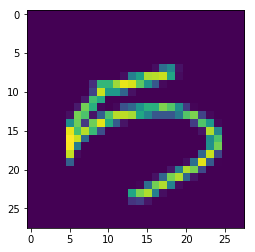

In [53]:
plt.imshow(test_no_lables['data'][4].reshape(28,28))

# Сдача

1. Регистрируетесь на конкурс https://www.kaggle.com/t/34e77301ef914c5792e4f4306144a6b3 
1. Преодолеваете "Pass level" baseline
1. После того, как вы преодолеете baseline, присылайте ноутбук с решение по адресу **voropaev@corp.mail.ru**

# Внимание
- Тему письма писать в формате "[МФТИ][1] Фамилия"
- Внутри писма прикрепляете файл ноутбука с именем <ваша фамилия>.ipynb